In [37]:
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import pyspark

In [4]:
agency = pd.read_csv('data/'+'agency.txt')
calendar_dates = pd.read_csv('data/'+'calendar_dates.txt')
feed_info = pd.read_csv('data/'+'feed_info.txt')
pathways = pd.read_csv('data/'+'pathways.txt')
routes = pd.read_csv('data/'+'routes.txt')
shapes = pd.read_csv('data/'+'shapes.txt')
stop_times = pd.read_csv('data/'+'stop_times.txt') #nagy
stops = pd.read_csv('data/'+'stops.txt')
trips = pd.read_csv('data/'+'trips.txt', dtype={'route_id': np.dtype('unicode')})

In [5]:
ejszakai = ['M2', 'M4', 'H5', 'H6', 'H8', 'H9',
            '6',
            '901', '907', '908', '909', '914', '914A',
            '916', '918', '922', '923', '930', '931',
            '934', '937', '938', '940', '941', '943',
            '948', '950', '950A', '956', '963', '964',
            '966', '968', '972', '972', '972B', '973',
            '979', '979A', '980', '990', '992', '994',
            '994', '996', '996A', '998', '999']

In [21]:
agency

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,BKK,BKK,http://www.bkk.hu,Europe/Budapest,hu,+36 1 3 255 255


In [42]:
calendar_dates.head(10)

,service_id,date,exception_type
0,B05716AHPKP-0011,20181105,1
1,B05716AHPKP-0011,20181106,1
2,B05716AHPKP-0011,20181107,1
3,B05716AHPKP-0011,20181108,1
4,B05716AHPKP-0011,20181109,1
5,B05716AHPKP-0011,20181110,1
6,B05716AHPKP-0011,20181112,1
7,B05716AHPKP-0011,20181113,1
8,B05716AHPKP-0011,20181114,1
9,B05716AHPKP-0011,20181115,1


In [43]:
feed_info.head(10)

,feed_publisher_name,feed_publisher_url,feed_lang,feed_start_date,feed_end_date,feed_version,feed_ext_version
0,BKK Zrt.,http://www.bkk.hu,hu,20181105,20181201,L1234-20181105,196


In [44]:
pathways.head(10)

,pathway_id,pathway_type,from_stop_id,to_stop_id,traversal_time,wheelchair_traversal_time
0,LM4KF1-LM4KFA,3,LM4KF1,LM4KFA,30,-1
1,LM4KF1-LM4KFB,3,LM4KF1,LM4KFB,150,-1
2,LM4KF1-LM4KFC,3,LM4KF1,LM4KFC,150,-1
3,LM4KF1-LM4KFD,3,LM4KF1,LM4KFD,180,-1
4,LM1OPV-F01079,1,LM1OPV,F01079,30,-1
5,LM1DF1-F00962,1,LM1DF1,F00962,30,-1
6,F01749-LM2OV1,1,F01749,LM2OV1,30,60
7,F00937-LM3NY1,1,F00937,LM3NY1,60,-1
8,F00937-LM3NY2,1,F00937,LM3NY2,60,-1
9,LM3CN1-LM3CNJ,3,LM3CN1,LM3CNJ,60,-1


In [25]:
routes.head(10)

,agency_id,route_id,route_short_name,route_long_name,route_type,route_desc,route_color,route_text_color
0,BKK,0050,5,NaN,3,"Pasaréti tér / Rákospalota, Kossuth utca",009FE3,FFFFFF
1,BKK,0070,7,NaN,3,"Albertfalva vasútállomás / Újpalota, Nyírpalot...",009FE3,FFFFFF
2,BKK,0075,7E,NaN,3,"Blaha Lujza tér M / Újpalota, Nyírpalota út",009FE3,FFFFFF
3,BKK,0078,7G,NaN,3,"Cinkotai autóbuszgarázs / Újpalota, Nyírpalota út",009FE3,FFFFFF
4,BKK,0085,8E,NaN,3,"Kelenföld vasútállomás M / Újpalota, Nyírpalot...",009FE3,FFFFFF
5,BKK,0090,9,NaN,3,"Óbuda, Bogdáni út / Kőbánya alsó vasútállomás",009FE3,FFFFFF
6,BKK,0100,10,NaN,3,Örs vezér tere M+H / Örs vezér tere M+H,009FE3,FFFFFF
7,BKK,0110,11,NaN,3,Batthyány tér M+H / Nagybányai út,009FE3,FFFFFF
8,BKK,0130,13,NaN,3,"Budatétény vasútállomás (Campona) / Diósd, Búz...",009FE3,FFFFFF
9,BKK,0131,13A,NaN,3,"Budatétény vasútállomás (Campona) / Diósd, Sas...",009FE3,FFFFFF


In [35]:
shapes.tail(100)

,shape_id,shape_pt_sequence,shape_pt_lat,shape_pt_lon,shape_dist_traveled
330187,Z962,100004,47.514368,19.050168,103.0
330188,Z962,100005,47.515070,19.050685,190.0
330189,Z962,100006,47.515500,19.051005,246.0
330190,Z962,100007,47.515491,19.051044,249.0
330191,Z962,200002,47.515500,19.051005,252.0
330192,Z962,200003,47.515780,19.051177,283.0
330193,Z962,200004,47.516338,19.051562,351.0
330194,Z962,200005,47.516824,19.051907,411.0
330195,Z962,200006,47.517265,19.052226,466.0
330196,Z962,200007,47.517714,19.052504,520.0


In [38]:
stop_times.head(100)

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,B0571610,F04181,08:03:00,08:03:00,0,NaN,NaN,NaN,0.0
1,B0571610,F04526,08:06:00,08:06:00,1,NaN,NaN,NaN,160.0
2,B0571611,F04526,08:30:00,08:30:00,0,NaN,NaN,NaN,0.0
3,B0571611,F04181,08:33:00,08:33:00,1,NaN,NaN,NaN,160.0
4,B0571612,F04181,08:33:00,08:33:00,0,NaN,NaN,NaN,0.0
5,B0571612,F04526,08:36:00,08:36:00,1,NaN,NaN,NaN,160.0
6,B0571613,F04526,09:00:00,09:00:00,0,NaN,NaN,NaN,0.0
7,B0571613,F04181,09:03:00,09:03:00,1,NaN,NaN,NaN,160.0
8,B0571614,F04181,09:03:00,09:03:00,0,NaN,NaN,NaN,0.0
9,B0571614,F04526,09:06:00,09:06:00,1,NaN,NaN,NaN,160.0


In [40]:
stops.head(10)

,stop_id,stop_name,stop_lat,stop_lon,stop_code,location_type,parent_station,wheelchair_boarding,stop_direction
0,002133,"Örs vezér tere M+H, déli tárolótér",47.500366,19.135700,NaN,NaN,NaN,2.0,NaN
1,002136,Fogas üzem (kapu),47.509119,19.014403,NaN,NaN,NaN,NaN,NaN
2,002138,Kőbánya alsó vasútállomás,47.483139,19.127891,NaN,NaN,NaN,2.0,NaN
3,003002,Puskás Ferenc Stadion M,47.500368,19.103406,NaN,NaN,NaN,2.0,NaN
4,003105,Bécsi út / Vörösvári út,47.548817,19.029722,NaN,NaN,NaN,2.0,NaN
5,003106,"Örs vezér tere M+H, északi tároló",47.505160,19.136637,NaN,NaN,NaN,2.0,NaN
6,003118,"Óbuda, Bogdáni út",47.551471,19.041971,NaN,NaN,NaN,2.0,NaN
7,004716,"ÉD metró járműtelep,porta",47.469651,19.129090,NaN,NaN,NaN,2.0,NaN
8,004948,Metró ÉD járműtelep (kapu),47.465239,19.142612,NaN,NaN,NaN,NaN,NaN
9,004952,Metró KNY járműtelep (kapu),47.502234,19.132179,NaN,NaN,NaN,NaN,NaN


In [29]:
trips.head(10)

,route_id,trip_id,service_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,boarding_door
0,8140,B0571610,B05716AHPKP-0011,"Soroksár, Molnár-sziget",0,B05716AHPKP-0011_1,Y701,1,1.0,2.0
1,8140,B0571611,B05716AHPKP-0011,Csepel-Királyerdő,1,B05716AHPKP-0011_1,Y702,1,1.0,2.0
2,8140,B0571612,B05716AHPKP-0011,"Soroksár, Molnár-sziget",0,B05716AHPKP-0011_1,Y701,1,1.0,2.0
3,8140,B0571613,B05716AHPKP-0011,Csepel-Királyerdő,1,B05716AHPKP-0011_1,Y702,1,1.0,2.0
4,8140,B0571614,B05716AHPKP-0011,"Soroksár, Molnár-sziget",0,B05716AHPKP-0011_1,Y701,1,1.0,2.0
5,8140,B0571615,B05716AHPKP-0011,Csepel-Királyerdő,1,B05716AHPKP-0011_1,Y702,1,1.0,2.0
6,8140,B0571616,B05716AHPKP-0011,"Soroksár, Molnár-sziget",0,B05716AHPKP-0011_1,Y701,1,1.0,2.0
7,8140,B0571617,B05716AHPKP-0011,Csepel-Királyerdő,1,B05716AHPKP-0011_1,Y702,1,1.0,2.0
8,8140,B0571618,B05716AHPKP-0011,"Soroksár, Molnár-sziget",0,B05716AHPKP-0011_1,Y701,1,1.0,2.0
9,8140,B0571619,B05716AHPKP-0011,Csepel-Királyerdő,1,B05716AHPKP-0011_1,Y702,1,1.0,2.0


In [30]:
stops.describe()

,stop_lat,stop_lon,location_type,wheelchair_boarding,stop_direction
count,5897.000000,5897.000000,315.000000,5713.000000,4994.00000
mean,47.489556,19.087720,1.552381,1.702958,2.65799
std,0.056835,0.080689,0.498040,0.456995,101.66483
min,47.174793,18.879484,1.000000,1.000000,-180.00000
25%,47.454695,19.032847,1.000000,1.000000,-77.00000
50%,47.492383,19.080820,2.000000,2.000000,2.50000
75%,47.523632,19.133051,2.000000,2.000000,98.00000
max,47.661038,19.358154,2.000000,2.000000,180.00000


In [31]:
def intdate(n):
    arr = n.split(':')
    return int(arr[0])*60*60+int(arr[1])*60+int(arr[2])

In [32]:
ll = list(map(intdate, stop_times['arrival_time']))

(0.0, 29870.0)

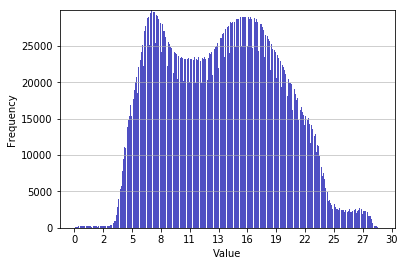

In [33]:
fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=ll, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
def price(x, n):
    ora = x//(60*60)
    return int(ora)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.xaxis.set_major_formatter(plt.FuncFormatter(price))

maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [104]:
max(ll)//(60*60)

29

In [115]:
def col0(n):
    arr = n.split(':')
    return int(arr[0])
ll = list(map(col0, stop_times['arrival_time']))
max(ll)

29

In [116]:
def col0(n):
    arr = n.split(':')
    return int(arr[1])
lll = list(map(col0, stop_times['arrival_time']))
max(lll)

59

In [14]:
(list(routes[routes['route_short_name'].isin(ejszakai)]['route_short_name']))

['6',
 'M2',
 'M4',
 'H8',
 'H8',
 'H9',
 'H6',
 'H6',
 'H6',
 'H5',
 'H5',
 '901',
 '907',
 '908',
 '909',
 '914',
 '914A',
 '916',
 '918',
 '922',
 '923',
 '930',
 '931',
 '934',
 '937',
 '938',
 '940',
 '941',
 '943',
 '948',
 '950',
 '950A',
 '956',
 '963',
 '964',
 '966',
 '968',
 '972',
 '972B',
 '973',
 '979',
 '979A',
 '980',
 '990',
 '992',
 '994',
 '996',
 '996A',
 '998',
 '999',
 'H6',
 '6']

In [15]:
len(ejszakai)

48